### Global Power Plant Database
### Problem Statement:

#### Description

    The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

    Key attributes of the database
    The database includes the following indicators:

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    `country_long` (text): longer form of the country designation
    `name` (text): name or title of the power plant, generally in Romanized form
    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    `capacity_mw` (number): electrical generating capacity in megawatts
    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `primary_fuel` (text): energy source used in primary electricity generation or export
    `other_fuel1` (text): energy source used in electricity generation or export
    `other_fuel2` (text): energy source used in electricity generation or export
    `other_fuel3` (text): energy source used in electricity generation or export
     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    `owner` (text): majority shareholder of the power plant, generally in Romanized form
    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    `url` (text): web document corresponding to the `source` field
    `geolocation_source` (text): attribution for geolocation information
    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    `year_of_capacity_data` (number): year the capacity information was reported
    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    `generation_data_source` (text): attribution for the reported generation information
    `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
    Fuel Type Aggregation
    We define the "Fuel Type" attribute of our database based on common fuel categories. 

    Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

### Machine Learning Steps:
    1.Define required libraries with which the model will optmised.
    2.Data Cleansing and Wrangling.
    3.Feature Engineering
    4.Data pre-processing
    5.Feature selection
    6.Split the data into training and testing
    7.Model selection
    8.Model validation
    9.Interpret the results

### Define the required libraries

In [1]:
#as of now we will import pandas, numpy library and the remainig will be downloaded at the time of theie requirement
import pandas as pd
import numpy as np

### loading the data set

In [2]:
data=pd.read_csv('powerplant.csv')

### EDA 

In [6]:
#data observations
data.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
#column names of the data set
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

### Data Cleansing and Wrangling.

In [14]:
# information of the fileds in the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

### Observations:
    1.there are 25 columns in the data set
    2.the maximum entries in the each field is 908
    3.wepp_id,other_fuel3, estimated_generation_gwh columns have no entries or all values are 0 we can drop them
    4.out of 25 there are 13 float data type fields and 12 object data typee fields

Dropping of columns

In [18]:
data1=data.drop(['other_fuel3','wepp_id','estimated_generation_gwh'], axis=1)

In [19]:
# loading the data into data frame
gppd=pd.DataFrame(data1)

### 1.Statistical Analysis

In [21]:
d=gppd.describe(include='all')
d

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908,908,908,908,908.000000,862.000000,862.000000,908,199,1,...,908,908,889,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450
unique,1,1,908,908,NaN,NaN,NaN,8,3,1,...,191,304,3,NaN,NaN,NaN,NaN,NaN,NaN,1
top,IND,India,SENGULAM,IND0000262,NaN,NaN,NaN,Coal,Oil,Oil,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority
freq,908,908,1,1,NaN,NaN,NaN,259,196,1,...,520,520,766,NaN,NaN,NaN,NaN,NaN,NaN,450
mean,NaN,NaN,NaN,NaN,321.046378,21.196189,77.447848,NaN,NaN,NaN,...,NaN,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,NaN,NaN,NaN,NaN,580.221767,6.248627,4.907260,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,NaN,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,16.837500,16.771575,74.258975,NaN,NaN,NaN,...,NaN,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,NaN,NaN,NaN,NaN,60.000000,21.778300,76.719250,NaN,NaN,NaN,...,NaN,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,NaN,NaN,NaN,NaN,388.125000,25.516375,79.441475,NaN,NaN,NaN,...,NaN,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN


In [25]:
for i in d:
    print('column name',i,'\n',d[i])

column name country 
 count     908
unique      1
top       IND
freq      908
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: country, dtype: object
column name country_long 
 count       908
unique        1
top       India
freq        908
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: country_long, dtype: object
column name name 
 count          908
unique         908
top       SENGULAM
freq             1
mean           NaN
std            NaN
min            NaN
25%            NaN
50%            NaN
75%            NaN
max            NaN
Name: name, dtype: object
column name gppd_idnr 
 count            908
unique           908
top       IND0000262
freq               1
mean             NaN
std              NaN
min              NaN
25%              NaN
50%              NaN
75%              NaN
max              NaN
Name: gppd_idnr, dtype: object
column name capaci

### Observations:
    1.from country column we can see that the colleted data set for INDIA only, so we can frop the country, country_long columns
    2.from name, gppd_idnr represents the same we can drop the name column also
    3.capacity_mw has 908 entries with mean and std having greate difference and also of min max percentiles has large differences
    4.latitude and longitude are 862 values are present out of 908
    with mean and median are almost equal, less std,less differences in min percentiles and max values
    5.primary fuel has 8 categories data with coal has leading with 259
    6.other_fuel1 has 196 entries remaining we will assume to be not using the other_fuel for the power plant
    7.other_fuel2 has one entry assuming that it not using the any other fuels in that power plant
    8.commissioning year has 528 entries out of 908, we can drop it
    9.name of owner has 280 entries out of 908, we can drop it
    10.source has 908 entries out of 908 with central electricity authority as leading with 520 times
    11.url also has 908 out of 908 with leading 520 times cea url, we can remove url column as source and url represnts the same
    12.Geolocation source has 889 entries out of 908
    13.year_of_capacity_data is unique so it no effect on any other independent column so we an remove this column also
    13.generation_gwh_2013,2014,2015,2016,2017 having missing values, we will assume them as zero power generation in that year

In [34]:
gppd1=gppd.drop(['country','country_long','name','commissioning_year','owner','url','year_of_capacity_data'],axis=1)

### filling the nan values

checking the nan values in each field

In [60]:
gppd1.isna().sum()

gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
source                      0
geolocation_source         19
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

### Observations:
    1.latitude and longitude are unique values we can't replace the missing values in them, just drop the missing rows
    2.other fuel column are going fill with na because we assume that some power plants are not using secondary fuels
    3.we will fill the missing values of geolocation with the highest occurance one
    4.power generation in year wise we will fill the nan values with na because we assume that the power plant was not operated
    in that year
    5.generation data source missing entires are going to fill with highest occurance value

In [128]:
#droping the entries with missing latitude and longitude values
gppd2=gppd1[gppd1['latitude'].notna()]

In [129]:
# we are going to fill the naa value in fuel column with na because we assumed that they are not using the other fuels
gppd2['other_fuel1'].replace(np.nan,'na', inplace=True)
gppd2['other_fuel2'].replace(np.nan,'na', inplace=True)

In [132]:
gppd2['geolocation_source'].describe()

count     862
unique      3
top       WRI
freq      739
Name: geolocation_source, dtype: object

In [131]:
# we are going to fill the geolocation_source nan value with the most occurance vale
gppd2['geolocation_source'].replace(np.nan,'WRI', inplace=True)

C:\Users\smahi\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [134]:
# power generation in 2013,2014,2015,2016,2017 missing values are going to fill with na
for i in ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']:
    gppd2[i].replace(np.nan,0, inplace=True)

C:\Users\smahi\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [115]:
gppd2['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [150]:
gppd2['generation_data_source'].unique()

array([0])

In [151]:
#generation data source is same for all the power plants we are going to drop it also
gppd2.drop(['generation_data_source'], axis=1, inplace=True)

C:\Users\smahi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Encoding

Converting the string type date to numeric data 

In [160]:
# importing the encoders from the sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb=LabelEncoder()
for i in gppd2.columns:
        gppd2[i]=lb.fit_transform(gppd2[i])

<ipython-input-160-76d8ce8f2939>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gppd2[i]=lb.fit_transform(gppd2[i])


### visual analysis

### 1.Univarient analysis

In [161]:
gppd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 907
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   gppd_idnr            862 non-null    int64
 1   capacity_mw          862 non-null    int64
 2   latitude             862 non-null    int64
 3   longitude            862 non-null    int64
 4   primary_fuel         862 non-null    int64
 5   other_fuel1          862 non-null    int64
 6   other_fuel2          862 non-null    int64
 7   source               862 non-null    int64
 8   geolocation_source   862 non-null    int64
 9   generation_gwh_2013  862 non-null    int64
 10  generation_gwh_2014  862 non-null    int64
 11  generation_gwh_2015  862 non-null    int64
 12  generation_gwh_2016  862 non-null    int64
 13  generation_gwh_2017  862 non-null    int64
dtypes: int64(14)
memory usage: 101.0 KB


array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

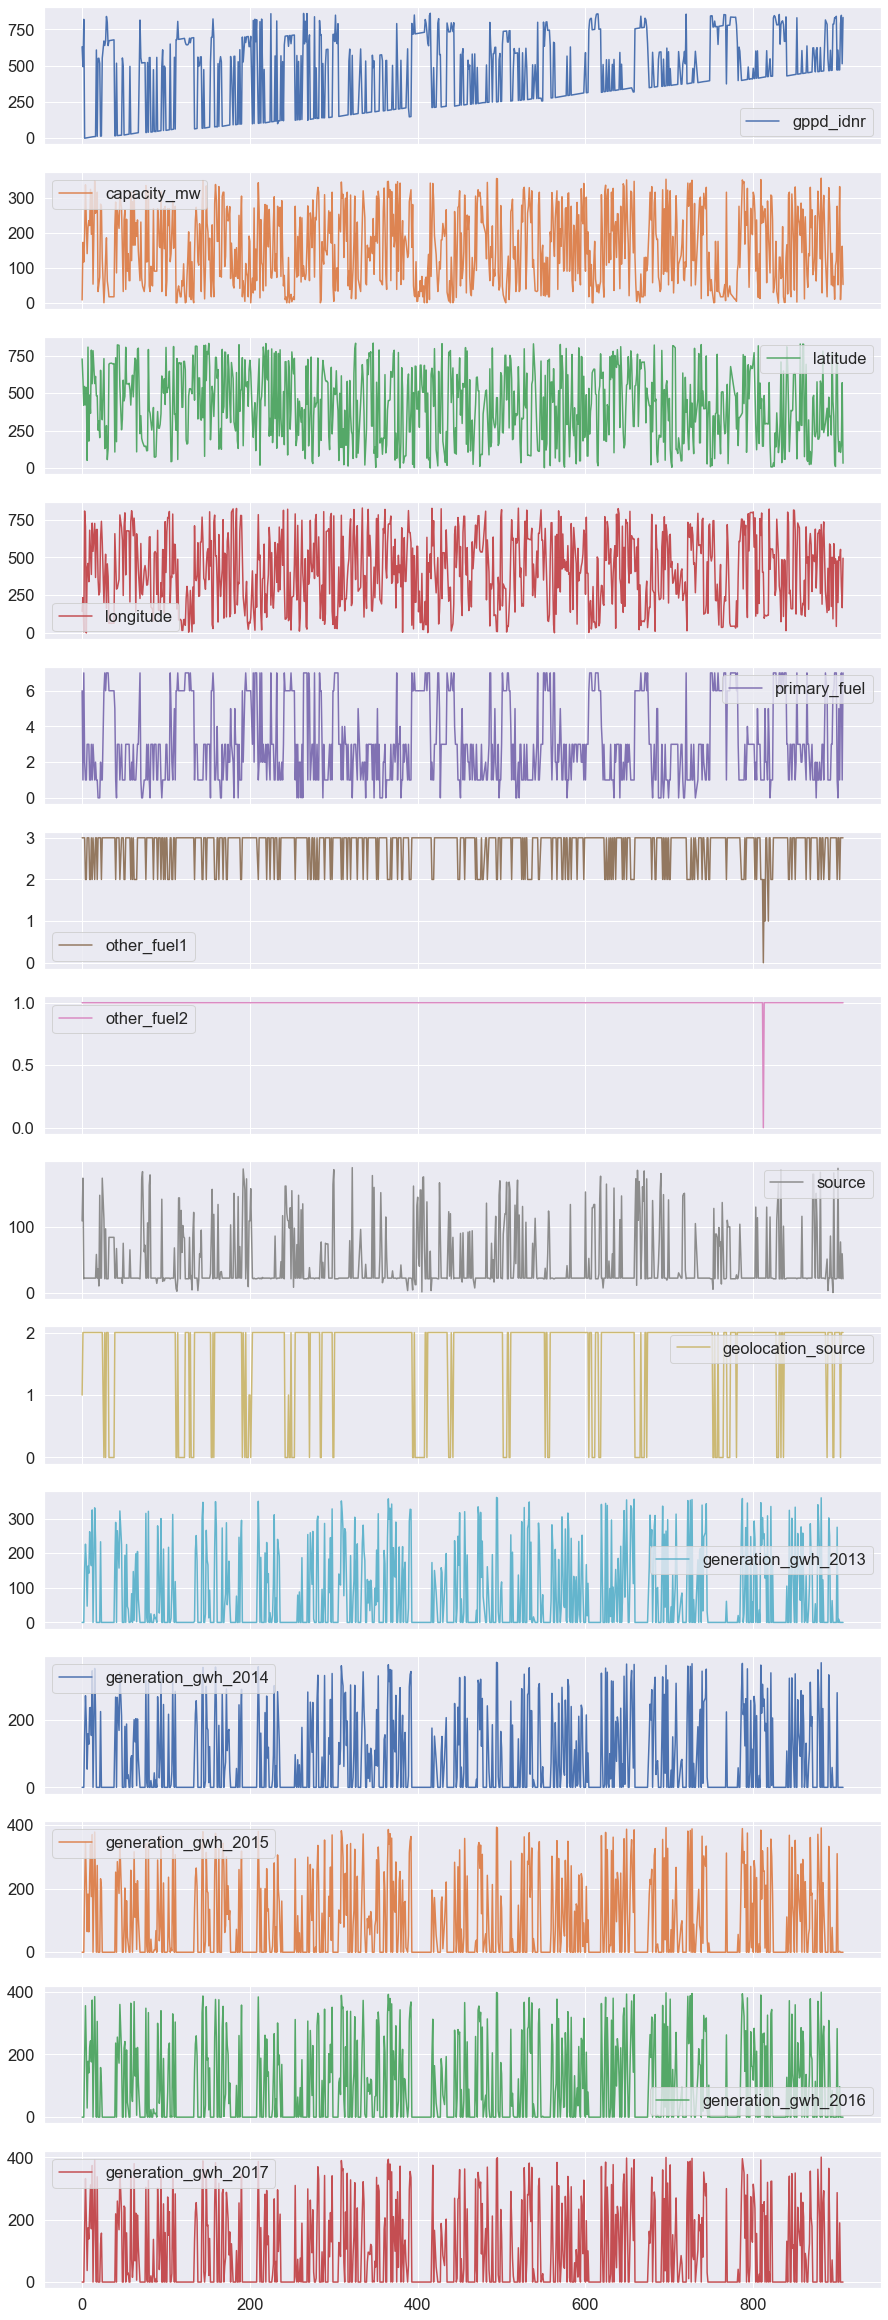

In [162]:
gppd2.plot(kind='line',subplots=True, layout=(15,1), figsize=(15,45))

### Observation:
    1.the graph of gppd_idnr is increasing trend since it is a unique number
    2.capacity_mw is ange of 0 to 4500 max
    3.latitude and longitude are uniqu value so the trend is that its linear
    4.primary fule is coal its found major in the graph
    5.other fuels1 oil is majorly using
    6.other fuel2 oil is majorly using
    7.power generation in 2013,2014,2015,2016,2017 from the power plants is ame


### Bivarient Analysis

In [163]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

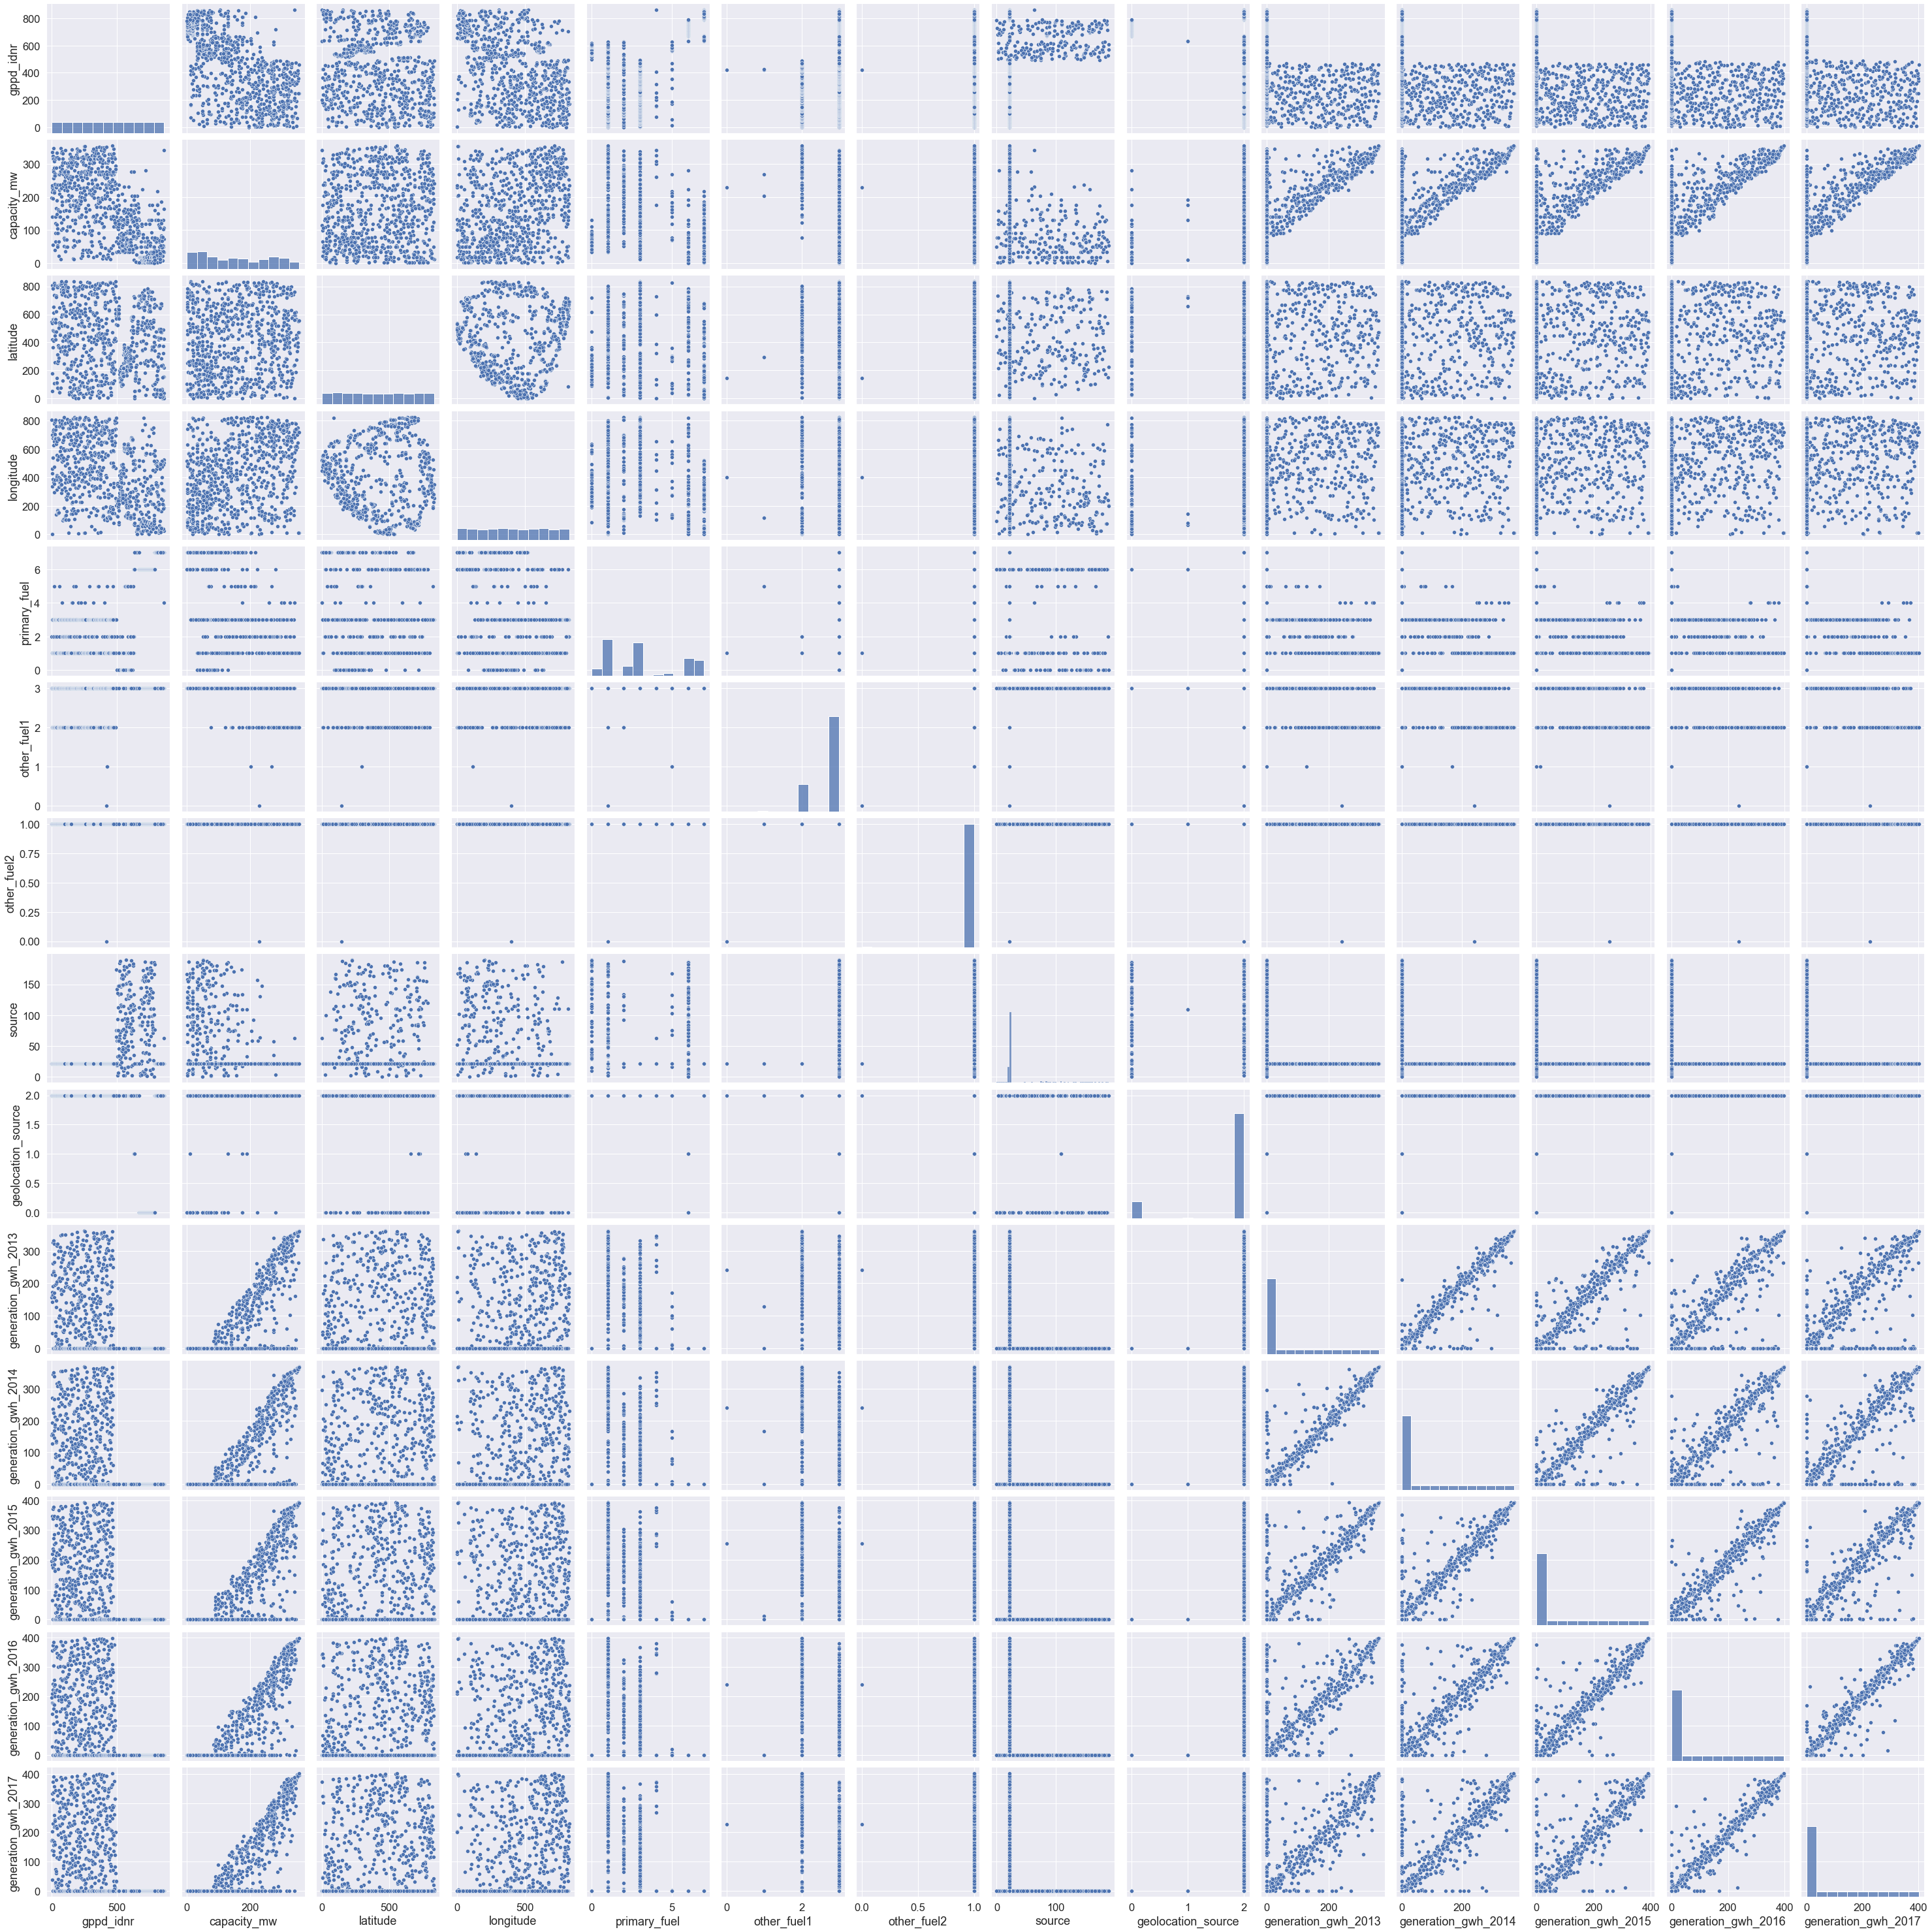

In [164]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=1.5)
sns.pairplot(gppd2,height=3)

### Observation:
    1.power generation is same in all the 4 years
    2.power generation with primary fuel is high
    3.power generatio with fuel1 is less
    4.power generation with fuel2 is very less
    5.high capacity power plants produced more more in the 4 years data
    6.geo location source is same for all the power plants
    7.high capacity power plants using coal as primary fuel source
    

### Since the Data is classification type
#### skewness checking is not required
#### correlation checking between the varibales not required
#### scaling not required

# Case-I

#### Primary Fuel Capacity as Target Varaible

In [165]:
gppd2.head(2)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,630,9,730,143,6,3,1,109,1,0,0,0,0,0
1,493,173,593,234,1,3,1,174,2,0,0,0,0,0


In [168]:
x1=gppd2.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13]]
y1=gppd2.iloc[:,4]

### Balancing the Data Set

In [170]:
x1.shape,y1.shape, y1.value_counts() # before balancing the data set

((862, 13),
 (862,),
 1    254
 3    232
 6    123
 7    108
 2     68
 0     50
 5     18
 4      9
 Name: primary_fuel, dtype: int64)

In [171]:
# importing the required library
from imblearn.over_sampling import SMOTE
x1, y1 = SMOTE().fit_resample(x1, y1)

In [172]:
x1.shape,y1.shape, y1.value_counts() # before balancing the data set

((2032, 13),
 (2032,),
 0    254
 1    254
 2    254
 3    254
 4    254
 5    254
 6    254
 7    254
 Name: primary_fuel, dtype: int64)

model selection
since the output is calssification type  we can use any 4 classification type models including logistic regression

In [179]:
# importing the required libraries for models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [174]:
lr,rf,ac,dt=LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()

### Hyper perameter tuning
Hyper parameter tuning is nothing but the finding the correct parameters of a model so the model can perform at it highest performance state

In [175]:
# for that we are going to import 
from sklearn.model_selection import GridSearchCV

In [180]:
knc, rfc,abc,dtc=KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), DecisionTreeClassifier()
#creating perameters
model_par={
           knc:{'model':knc,'param':{'n_neighbors' : [5,6,7],'leaf_size':[30,40,50]}},
    rfc:{'model':rfc,'param':{'n_estimators':[100,150,200],'min_samples_split':[2,3,4]}},
    abc:{'model':abc,'param':{'n_estimators':[50,100,150],'learning_rate':[1,1.2,1.5]}},
    dtc:{'model':dtc,'param':{'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}}
           }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x1,y1)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': KNeighborsClassifier(),
  'best_score': 0.8435204124859297,
  'best_params': {'leaf_size': 30, 'n_neighbors': 5}},
 {'model': RandomForestClassifier(),
  'best_score': 0.9380145483593759,
  'best_params': {'min_samples_split': 2, 'n_estimators': 150}},
 {'model': AdaBoostClassifier(),
  'best_score': 0.575277471829196,
  'best_params': {'learning_rate': 1.2, 'n_estimators': 50}},
 {'model': DecisionTreeClassifier(),
  'best_score': 0.9114329286743079,
  'best_params': {'min_samples_leaf': 1, 'min_samples_split': 2}}]

### model selection

    From the above grid search cv we can clearly see that the random forest calssifier performs best for this data set
    So we can use RandomForestClassifier()

In [182]:
 rf=RandomForestClassifier(min_samples_split=2,n_estimators=150)

In [187]:
tep,trp,cv,I=[],[],[],[]
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3, random_state=i)
    rf.fit(xtrain,ytrain)
    test_pre=rf.predict(xtest)
    train_pre=rf.predict(xtrain)
    Tep=accuracy_score(ytest,test_pre)
    Trp=accuracy_score(ytrain,train_pre)
    Cv=cross_val_score(rf,x1,y1,cv=3).mean()*100
    tep.append(Tep)
    trp.append(Trp)
    cv.append(Cv)
    I.append(i)
    
values=pd.DataFrame({'Test_acc':tep,'Train_acc':trp,'Cross_validation_score':cv,'random_state':I})
values.sort_values(by='Test_acc',inplace=True,ignore_index=True)
print('the model performs best at random state',values.iloc[0,3])
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.4, random_state=values.iloc[0,3])
test_pre=rf.predict(xtest)
train_pre=rf.predict(xtrain)
print("test accuracy_score of",accuracy_score(ytest,test_pre)*100)
print("train accuracy_score of",accuracy_score(ytrain,train_pre)*100)
print("cross validation score", cross_val_score(rf,x1,y1,cv=3).mean()*100)
print("confusion_matrix of",'\n', confusion_matrix(ytest,test_pre))
print("classification_report of",'\n',classification_report(ytest,test_pre))

the model performs best at random state 21
test accuracy_score of 98.0319803198032
train accuracy_score of 98.35931091058244
cross validation score 91.73431284122647
confusion_matrix of 
 [[106   1   0   0   0   0   0   0]
 [  2 108   0   0   0   1   0   0]
 [  0   1  83   2   0   4   0   0]
 [  0   0   2 107   1   0   0   0]
 [  0   0   0   1  85   1   0   0]
 [  0   0   0   0   0 110   0   0]
 [  0   0   0   0   0   0  94   0]
 [  0   0   0   0   0   0   0 104]]
classification_report of 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.97      0.98       111
           2       0.98      0.92      0.95        90
           3       0.97      0.97      0.97       110
           4       0.99      0.98      0.98        87
           5       0.95      1.00      0.97       110
           6       1.00      1.00      1.00        94
           7       1.00      1.00      1.00       104

    accuracy    

In [197]:
#model saving
import pickle
filename='gppd1.pkl'
pickle.dump(rf,open(filename,'wb'))

# Case-II

### Plant capacity as target Variable

In [188]:
gppd2.head(2)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,630,9,730,143,6,3,1,109,1,0,0,0,0,0
1,493,173,593,234,1,3,1,174,2,0,0,0,0,0


In [199]:
x=gppd2.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]]
y=gppd2.iloc[:,1]

In [200]:
# importing the required libraries
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

### Hyper perameter tuning
Hyper parameter tuning is nothing but the finding the correct parameters of a model so the model can perform at it highest performance state

In [201]:
rf, ab,dt,lr=RandomForestRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), LinearRegression()
#creating perameters
model_par={'DecisionTreeRegressor':{'model':dt,'param':{'criterion' : ["mse", "friedman_mse", "mae", "poisson"],'splitter':['best','random']}},
           'RandomForestRegressor':{'model':rf,'param':{'n_estimators':[100,120,150],'criterion':['mse', 'mae'],'max_features':['auto','sqrt','log2']}},
           'AdaBoostRegressor':{'model':ab,'param':{'loss':['linear', 'square', 'exponential']}},
           'LinearRegression':{'model':lr,'param':{'fit_intercept':[True],'normalize':[True]}}
          }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': 0.7026631655367523,
  'best_params': {'criterion': 'poisson', 'splitter': 'best'}},
 {'model': 'RandomForestRegressor',
  'best_score': 0.8296579414211358,
  'best_params': {'criterion': 'mae',
   'max_features': 'sqrt',
   'n_estimators': 120}},
 {'model': 'AdaBoostRegressor',
  'best_score': 0.7482871196324917,
  'best_params': {'loss': 'linear'}},
 {'model': 'LinearRegression',
  'best_score': 0.7498567100591567,
  'best_params': {'fit_intercept': True, 'normalize': True}}]

### model selection
From the above grid search cv we can clearly see that the random forest regressor performs best for this data set
So we can use RandomForestRegressor()

In [204]:
rfg=RandomForestRegressor(criterion='mae',max_features='sqrt',n_estimators=120)

In [205]:
I=[]
score=[]
ma=[]
ms=[]
r2=[]
cv=[]

for i in range(1,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=i)
        rfg.fit(xtrain,ytrain)
        tr=rfg.score(xtrain,ytrain)
        te=rfg.score(xtest,ytest)
        pre=rfg.predict(xtest)
        mar=mean_absolute_error(ytest,pre)
        mse=np.sqrt(mean_squared_error(ytest,pre))
        CV=cross_val_score(rfg,x,y,cv=4).mean()*100
        r=r2_score(ytest,pre)
        I.append(i)
        score.append(te)
        ma.append(mar)
        ms.append(mse)
        r2.append(r)
        cv.append(CV)
values=pd.DataFrame({'accuracy':score,'r2_score':r2,'r_state':I,'error':ms,'CV_score':cv})
values.sort_values(by='accuracy', ascending=False, inplace=True,ignore_index=True)
print('at random state',round(values.loc[0][2],0),'the model having the highest accuracy of',round(values.loc[0][0]*100,2))
print('Mean Square Error Value',values.loc[0][3],'CV_Score',values.loc[0][4])

at random state 7.0 the model having the highest accuracy of 89.24
Mean Square Error Value 36.56569973843858 CV_Score 82.75198251202761


In [206]:
#model saving
import pickle
filename='gppd2.pkl'
pickle.dump(rfg,open(filename,'wb'))